## Portfolio 2: Analysis of Yelp Dataset (Data Processing Techniques)

The portfolio aims to use various data processing techniques to clean and preprocess the data, filter out irrelevant data, and remove any outliers that could impact the accuracy of the model. Finally, the portfolio aims to use linear regression models to train and validate the model's accuracy in predicting user ratings towards business. Ultimately, the objective is to build a reliable model that can be used to provide insights into user preferences and help businesses make data-driven decisions to improve their services and offerings. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use Yelp sub-dataset.

### Import the output sample data from Portfolio1

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [122]:
#print length of "sample_data"
sample_data = pd.read_csv('Yelp_Portfolio2_Input.csv')
print("The length of the unique businesses is: ", len(sample_data))

The length of the unique businesses is:  38654


In [123]:
sample_data.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
1,Tattoo; Beauty & Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
2,Tires; Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
3,Sushi Bars; Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
4,Arts & Entertainment; Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g


# Task 1: `business_categories` processing

You may notice that there are a total of 693 unique business categories present in the sample data. Please write a code snippet to confirm this number. Then, generate a boxplot of `stars` for `business_categories`.

In [124]:
#code snippet to confirm 693 unique business categories 
unique_category = sample_data['business_categories'].nunique()
unique_category

693

In [125]:
#get the data for unique business categories

Category_stars = sample_data.groupby(['business_categories'])['stars'].count().reset_index(name = 'Stars')
Category_stars

,business_categories,Stars
0,Accessories; Fashion; Shopping; Cosmetics & Be...,4
1,Active Life,36
2,Active Life; Amateur Sports Teams,6
3,Active Life; Amateur Sports Teams; Parks,9
4,Active Life; American (New); Golf; Restaurants,17
5,Active Life; American (Traditional); Amusement...,3
6,Active Life; American (Traditional); Golf; Res...,6
7,Active Life; Amusement Parks,52
8,Active Life; Amusement Parks; Climbing; Gyms; ...,23
9,Active Life; Amusement Parks; Nightlife; Bowling,22


<AxesSubplot:>

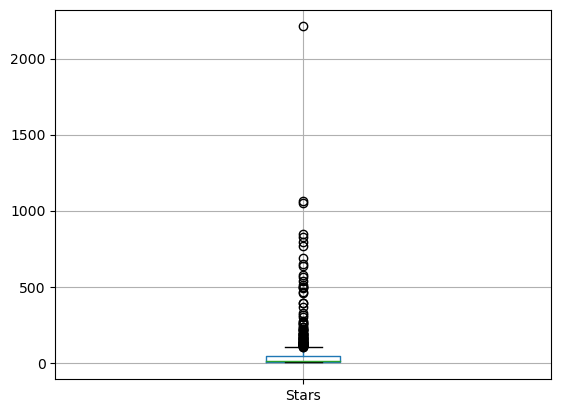

In [126]:
#generate a boxplot of `stars` for `business_categories'
Category_stars.boxplot('Stars')

Sometimes we need to extract some major categories, such as `Middle Eastern; Restaurants` and `Sushi Bars; Restaurants`, both of which should belong to the `Restaurants` category.

### Task 1.1 : Efficiently and accurately extracting the last category value (i.e., categorieN) from the `business_categories` column in a dataset, where the format of each row is a semicolon-separated list of categories (i.e., 'categorie1; categorie2;...;categorieN'), and replacing the original string with this last category value. 

In [127]:
#define the function to split business category and return only last value
def last_value(string):
    return string.split()[-1]

#display only the last value of each input in the business categories column
sample_data['business_categories'] = sample_data['business_categories'].apply(lambda x: last_value(x.split(';')[-1]))
sample_data.reset_index()
sample_data.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
1,Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
2,Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
3,Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
4,Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g


### Task1.2 : Check how many unique business categories are present in the dataset (output from Task 1.1). Display `ALL Rows` of the business category count data, which is to count and print the number of occurrences for each business category.

In [128]:
#number of unique businesses 
unique_category = sample_data['business_categories'].nunique()
unique_category

139

In [129]:
#display all rows of business category count data
businesscat_count = sample_data['business_categories'].value_counts().reset_index()
pd.set_option('display.max_rows', None)
businesscat_count

,index,business_categories
0,Restaurants,25212
1,Tea,1116
2,Shopping,1099
3,Italian,960
4,Yogurt,728
5,Hotels,528
6,Spas,498
7,Stores,451
8,Nightlife,399
9,Services,396


### Task 1.3 : Remove categories that appear fewer than 200 times. Write a Python code snippet to perform this operation. Print the number of resulting unique business_categories.

In [130]:
#Remove categories appearing less than 200x
businesscat_200above = businesscat_count[businesscat_count.business_categories >=200]
businesscat_200above

,index,business_categories
0,Restaurants,25212
1,Tea,1116
2,Shopping,1099
3,Italian,960
4,Yogurt,728
5,Hotels,528
6,Spas,498
7,Stores,451
8,Nightlife,399
9,Services,396


In [131]:
#output the length of the resulting cleaned dataset
print("The length of the businesses categories appearing more than 200 times is: ", len(businesscat_200above))

The length of the businesses categories appearing more than 200 times is:  21


# Task 2: Outliers

### Task 2.1: Remove any rows from the sample_data DataFrame (output from Task 1.3) where the `useful` column has a value of 6 or more; Then, create a single figure with two subplots, one showing the boxplot of `useful` column of the original data and the other showing the boxplot of the data with outliers removed. 

Text(0.5, 1.0, 'Box Plot of Useful (w/o outliers)')

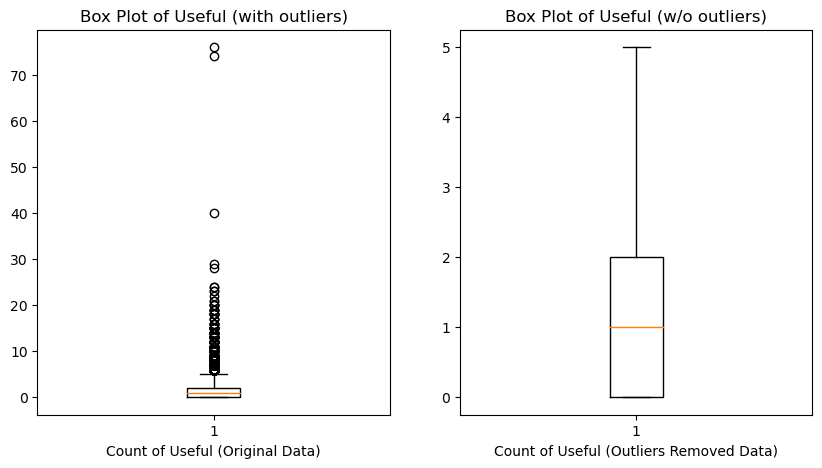

In [132]:
#display all rows of business category count data
businesscat_count = sample_data['business_categories'].value_counts()

#display business categories appearing < 200 times
businesscat_less200 = businesscat_count[businesscat_count < 200].index

#display business categories appearing >200times
sample_above200 = sample_data[~sample_data['business_categories'].isin(businesscat_less200)]

#display useful column with <6 values
sample_usefulbelow6 = sample_above200[sample_above200['useful']<6]

#create subplots for Useful (original vs removed outliers)
fig, axs = plt.subplots(ncols=2, figsize = (10,5))
axs[0].set_xlabel('Count of Useful (Original Data)')
axs[1].set_xlabel('Count of Useful (Outliers Removed Data)')

axs[0].boxplot(sample_above200['useful'])
axs[0].set_title('Box Plot of Useful (with outliers)')

axs[1].boxplot(sample_usefulbelow6['useful'])
axs[1].set_title('Box Plot of Useful (w/o outliers)')

In [133]:
#output the length of the Useful count with outliers removed
print("The length of the Useful Column (with outliers) is: ", len(sample_above200))
print("The length of the Useful Column (outliers removed) is: ", len(sample_usefulbelow6))

The length of the Useful Column (with outliers) is:  34543
The length of the Useful Column (outliers removed) is:  33564


### Task 2.2 : Remove some extremely active users from a dataset (output from Task 2.1) who rate businesses more than 30 times (>30), then create a single figure with two subplots, one showing the boxplot of the count of business rating given by each user and the other showing the boxplot of the data with outliers removed. 



In [134]:
#count of ratings of user_ids
sample_user_ratingcount = sample_usefulbelow6.groupby(['user_id']).size()

#filter users who rate >30 times
users_ratingless30 = sample_user_ratingcount[sample_user_ratingcount <= 30]
clean_usercount = sample_usefulbelow6[sample_usefulbelow6['user_id'].isin(users_ratingless30.index)]

#display count of users with ratings <30
new_usercount = clean_usercount.groupby(['user_id']).size()


Text(0.5, 1.0, 'Box Plot of User Ratings Count (Rating Count < 30)')

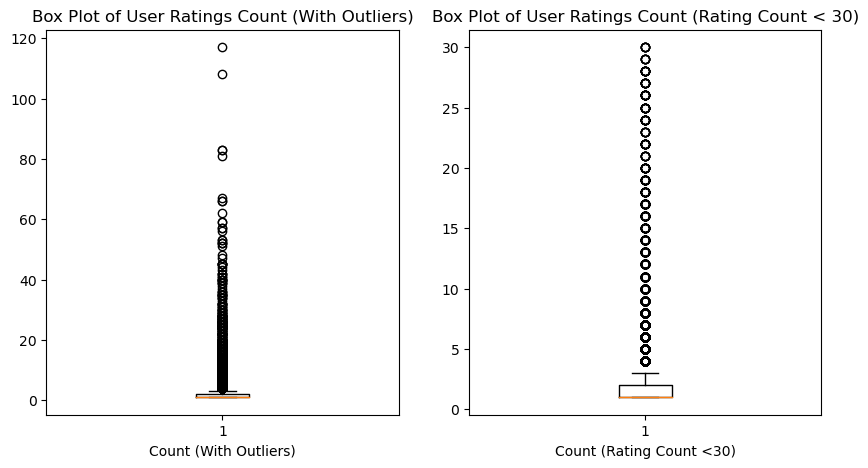

In [135]:
#create subplots fore count of business rating of Users
fig, axs = plt.subplots(ncols=2, figsize = (10,5))
axs[0].set_xlabel('Count (With Outliers)')
axs[1].set_xlabel('Count (Rating Count <30)')

axs[0].boxplot(sample_user_ratingcount)
axs[0].set_title('Box Plot of User Ratings Count (With Outliers)')

axs[1].boxplot(new_usercount)
axs[1].set_title('Box Plot of User Ratings Count (Rating Count < 30)')

In [136]:
#output the length of the  users with ratings <30
print("The length of the users with ratings (with outliers)  is: ", len(sample_user_ratingcount))
print("The length of the users with ratings <30 is: ", len(new_usercount))

The length of the users with ratings (with outliers)  is:  12864
The length of the users with ratings <30 is:  12800


# Task 3: Training a LinearRegression model on the data output from Task 2.2.

### Task 3.1: How to build a linear regression model on a subset of the data, using the `useful` column as the input variable and the `stars` column as the output variable. Split the data into a training set and a test set, with 70% of the data used for training. The random_state is set to 42.

In [137]:
#separate datasets
train, test = train_test_split(clean_usercount, test_size=0.70, random_state=42)
print(train.shape)
print(test.shape)

(9165, 8)
(21387, 8)


In [138]:
#input linear regression model values for train and test
reg = linear_model.LinearRegression()
X_train = train[['useful']]
y_train = train['stars']

X_test = test[['useful']]
y_test = test['stars']

reg.fit(X_train , y_train)

LinearRegression()

In [139]:
#prediction and evaluation X Test

predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("R Squared:", r2)

MSE: 1.516418994279081
RMSE: 1.2314296546206287
R Squared: 0.005859907915135465


In [140]:
#prediction and evaluation X Train

predicted = reg.predict(X_train)
mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
r2 = r2_score(y_train, predicted)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("R Squared:", r2)

MSE: 1.5211067372213265
RMSE: 1.2333315601334973
R Squared: 0.0037474586000983967


### Task 3.2: Assuming that the number of reviews a business has received  `business_review_count`  can greatly influence the average rating that the business has received. Now, we create the relevant variable to the data, and do the LinearRegression again to the `stars`. 

In [141]:
#count of reviews of business IDs
business_review_count = clean_usercount.groupby(['business_id'])['text'].size().reset_index(name='business_review_count_')

#insert column for business review count
business_review_count.rename(columns={'business_review_count_':'business_review_count'}, inplace=True)

#merge business review count column to the original data
clean_usercount_new = pd.merge(clean_usercount, business_review_count, on='business_id')

In [142]:
#separate datasets
train, test = train_test_split(clean_usercount_new, test_size=0.70, random_state=42)
print(train.shape)
print(test.shape)

(9165, 9)
(21387, 9)


In [143]:
#input linear regression model values for train and test
reg = linear_model.LinearRegression()
X_train = train[['business_review_count']]
y_train = train['stars']


X_test = test[['business_review_count']]
y_test = test['stars']
reg.fit(X_train , y_train)

LinearRegression()

In [144]:
#prediction and evaluation X Test

predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("R Squared:", r2)

MSE: 1.4919377739186408
RMSE: 1.2214490467959116
R Squared: 0.019651641770841444


In [145]:
#prediction and evaluation X Train

predicted = reg.predict(X_train)
mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
r2 = r2_score(y_train, predicted)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("R Squared:", r2)

MSE: 1.4971575577751484
RMSE: 1.223583898952233
R Squared: 0.02433246692037383


### Task 3.3: Output the correlations between `business_review_count` and `useful` variables with `stars` and analyze the results.

In [146]:
clean_usercount_new.corr()

,stars,useful,business_review_count
stars,1.000000,-0.073588,0.146849
useful,-0.073588,1.000000,0.007573
business_review_count,0.146849,0.007573,1.000000


There is a negligible/insignificant correlation between Business Review Count and Useful Variables with Stars. This means that there is no linear relationship between any of two variables. If a business review count increases, it does not mean that stars or useful votes will also increase, or the other way around.